# Business Insights Manager - Take Home Analysis


**This notebook analyzes the retention of an anonymized data set of Capsule patient orders in 2018.**

Background:
-  *For obvious reasons, retention - defined as customers continuing to place orders - is critical to Capsule’s continued growth. The Insights team is constantly monitoring order data to understand how well we are retaining customers. It’s critical to that we understand what retention looks like at a given time, how it is trending, why it is trending the way it is, as well as how this looks across different subsets and segments of our customer base.*

What you’re looking at:
-  *This is an anonymized data set containing order information. Each row represents a single order by a customer, and includes more information about the customer and the order.*

What we’re interested in:
-  *Based on this order information, we’re interested in understanding Capsule’s retention. What percentage of our customers are we retaining? Are we getting better or worse at retaining customers? Are we doing better with some types of customers than other?*

Explanation of Columns:
-  **Patient ID:** This is a unique identifier for each Capsule customer
-  **Acquisition Source:** This refers to the source by which we acquired this customer. Activated
Doctor means that they came from our sales channel, whereas Organic means they signed up on
their own, potentially driven by marketing. This criteria is set at a customer-level.
-  **Order ID:** This is a unique identifier for each Capsule order
-  **Order Date:** This is the date that the order was delivered
-  **Delivered On Time:** This indicates whether the order was delivered on time. A “1” indicates on
time delivery whereas a “0” indicates a late delivery.
-  **Partnerships Manager:** This is the name of the salesperson who covers the provider who sent
us this patient. This is most interesting as a proxy for specialty. E.g. Tikki covers all OBGYN providers, so a customer with her name next to them likely came from an OBGYN. This criteria is set at a customer-level.
-  **Is Patient Recurring:** This indicates whether the patient has a recurring medication at Capsule. A “1” indicates the presence of a recurring medication, whereas a “0” indicates that there are none. A recurring medication is one that a patient is expected to take repeatedly (e.g. birth control) as opposed to something that is taken one time (e.g. an antibiotic). This number is set at a customer-level.
-  **Medication Classes:** This lists the various types of medication that the customer takes in list form. This is set at a customer-level.


All of these orders are from 2018 and you can assume that for each customer in the data set, you have their complete order history.

Output Format:
-  The output can be whatever you prefer - a one-sheeter, a presentation, an excel file. We’re most interested in your high level thoughts on how the business is performing when it comes to retention, and any trends you are seeing in either the overall business or subsets that you can derive from the provided data.

## Analysis Overview

- **Section 0** - Data import and setup
- **Section 1** - Cohort Anaylsis I: Based simply on the patients' first order period (monthly)
- **Section 2** - Cohort Anaylsis II: Based on the patients' first order period and acquisition source
- **Section 3** - Cohort Anaylsis III: Based on the patients' first order period and whether they have recurring medication
- **Section 4** - Cohort Anaylsis IV: Based on the patients' first order period and whether first delivery was on time
- **Section 5** - Cohort Anaylsis V: Based on the patients' first order period and partner manager

## <font color=red>Summary of Results: </font>

**Executive Summary / Key Findings:**
- 1) Capsule has a ~40% one-month retention rate. This # falls to ~20-25% long-term. These short-term and long-term retention rates have remained fairly stable over the time period provided. 
- 2) Retention rates are highest amongst customers acquired organically (~50% one-month retention rate, ~30% long-term), and are lowest amongst customers acquired via an Activated Doctor (~30% one-month retention rate, ~15% long-term). 
- 3) Similarly, higher rentention is observed when looking at customers who have a recurring medication vs. those who do not. 
- 4) Moreover, retention levels are about equal amongst customers whose first order was delivered on time vs. those whose first order was not. 
- 5) Looking into the Partnership Managers, it appears retention rates differ significantly depending on the manager. Given that each manager covers a unique provider, the patient 'quality' can vary drastically depending on the specialty of the provider.

**Recommendations:**
- Based on the observed rates, Capsule should focus retention efforts on customers acquired non-Organically, with a priority on those acquired via an Activated Doctor. Note that roughly two-thirds of customers are acquired via an Activated or Unactivated Doctor.
- In addition, focus more effort into retaining customers who do not have a recurring medication. This should go without saying, and the data validates it.
- From a customer service standpoint, if outreach has been taken to apologize / compensate for first orders not being delivered on time, continue to do so as this seems to help retain said customers (seeing that retention rates are in-line across customers whose first order was delivered on time vs. those whose first order was not). If this is not the case, do not worry as much about following up with customers whose first order was not delivered on time, as it appears this is not super impactful in ultimately retaining such customers.
- Lastly, the data suggests retention is quite strong amongst patients who were sent via providers covered by Chelsey, Jason, Nishant, and Tom. Whereas retention is below average for patients sent from providers covered by Corinne, Jesse, Kylene and Kerry. This could use a second look - see next step below.


**Additional Analyses / Next Steps:**
- Although not covered in the original analysis, a deep dive into the medication classes (the various types of medication that a customer takes) to better understand which types are linked to customers with lower rentention.
- Also, an in-depth exploration of retention by Parnership Manager to gauge the specialties that map to the providers that each manager supports. This could ultimately lead to the identification of specialities which map to higher and lower retention patients. Prioritize Corinne, Jesse, Kerry, and Nishant given that their providers have sent the most patients and these patients have above or below average retention metrics.
- Potentially look at a different order period window for cohort analysis - e.g. weekly.
- Consider additional combinations of variables for more niche cuts - e.g. CohortGroup x Acquisition Source x Is Patient Recurring.

### <font color=blue>0) Data Import and Setup</font>

**a. Import libraries **

In [1]:
# imports below

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

**b. Read in data**

In [2]:
# read in file
df = pd.read_csv('/Users/malonzo/Downloads/Take Home Data.csv')

# preview data
df.head()

,patient_id,acquisition_source,order_id,order_date,delivered_on_time,partnerships_manager,is_patient_recurring,medication_classes
0,37616,Organic,233713,10-10-2018,1,NaN,0,"Electrolyte Balance-Nutritional Products, Geni..."
1,41943,Organic,159926,06-08-2018,1,Jason,0,"Anti-Infective Agents,"
2,41943,Organic,241569,10-20-2018,1,Jason,0,"Anti-Infective Agents,"
3,41943,Organic,249165,10-30-2018,1,Jason,0,"Anti-Infective Agents,"
4,50647,Organic,181908,07-19-2018,1,NaN,0,"Immunosuppressive Agents,"


**c. Adjust data type of 'order_date' field and create 'OrderPeriod' field based on 'order_date' for monthly cohort analysis**

In [3]:
# adjust to datetime data type
df['order_date'] = pd.to_datetime(df['order_date'])

In [4]:
# replace null partnership managers with 'none'
df['partnerships_manager'] = df['partnerships_manager'].fillna('none')

In [5]:
# create monthly OrderPeriod field
df['OrderPeriod'] = df.order_date.apply(lambda x: x.strftime('%Y-%m'))

# preview data
df.head()

,patient_id,acquisition_source,order_id,order_date,delivered_on_time,partnerships_manager,is_patient_recurring,medication_classes,OrderPeriod
0,37616,Organic,233713,2018-10-10,1,none,0,"Electrolyte Balance-Nutritional Products, Geni...",2018-10
1,41943,Organic,159926,2018-06-08,1,Jason,0,"Anti-Infective Agents,",2018-06
2,41943,Organic,241569,2018-10-20,1,Jason,0,"Anti-Infective Agents,",2018-10
3,41943,Organic,249165,2018-10-30,1,Jason,0,"Anti-Infective Agents,",2018-10
4,50647,Organic,181908,2018-07-19,1,none,0,"Immunosuppressive Agents,",2018-07


**d. Determine patient's monthly cohort group (based on their first order)**

In [6]:
# set 'patient_id' to index level 0
df.reset_index(inplace=True)
df.set_index('patient_id', inplace=True)

# create CohortGroup (monthly)
df['CohortGroup'] = df.groupby(level=0)['order_date'].min().apply(lambda x: x.strftime('%Y-%m'))

# reset index 
df.reset_index(inplace=True)

# preview data
df.head()

,patient_id,index,acquisition_source,order_id,order_date,delivered_on_time,partnerships_manager,is_patient_recurring,medication_classes,OrderPeriod,CohortGroup
0,37616,0,Organic,233713,2018-10-10,1,none,0,"Electrolyte Balance-Nutritional Products, Geni...",2018-10,2018-10
1,41943,1,Organic,159926,2018-06-08,1,Jason,0,"Anti-Infective Agents,",2018-06,2018-06
2,41943,2,Organic,241569,2018-10-20,1,Jason,0,"Anti-Infective Agents,",2018-10,2018-06
3,41943,3,Organic,249165,2018-10-30,1,Jason,0,"Anti-Infective Agents,",2018-10,2018-06
4,50647,4,Organic,181908,2018-07-19,1,none,0,"Immunosuppressive Agents,",2018-07,2018-05


**e. Create additional cohort group 'views'**

In [7]:
# Create additional fields for different cohort analysis 'views'
# These are all set at a customer-level, so can simply merge fields
df['CohortGroup_x_Acq_Source'] = df['CohortGroup'] + '_' +  df['acquisition_source']

df['CohortGroup_x_Recurring'] = df['CohortGroup'] + '_' +  df['is_patient_recurring'].astype(str)

df['CohortGroup_x_Partner_Manager'] = df['CohortGroup'] + '_' +  df['partnerships_manager']

In [8]:
# create temp df to store info on first order
df_temp = df[df['OrderPeriod'] == df['CohortGroup']]

In [9]:
# merge dataframes with new field 'delivered_on_time_firstOrder'
df = pd.merge(df,df_temp[['patient_id','delivered_on_time']],on='patient_id', how='left',suffixes=('','_firstOrder'))

In [10]:
# Create additional field for different cohort analysis 'view'
df['CohortGroup_x_First_Delivery_OnTime'] = df['CohortGroup'] + '_' +  df['delivered_on_time_firstOrder'].astype(str)

### <font color=blue>1) Cohort Anaylsis I: Based simply on the patients' first order period (monthly)</font>

**a. Pull count of customers and orders by Cohort Group, and Rollup data by CohortGroup & OrderPeriod**

In [11]:
grouped = df.groupby(['CohortGroup'])

# count the unique users, orders per Group + Period
cohorts = grouped.agg({'patient_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'patient_id': 'TotalPatients',
                        'order_id': 'TotalOrders'}, inplace=True)
cohorts

,TotalPatients,TotalOrders
CohortGroup,,
2018-05,1990,9639
2018-06,1948,9520
2018-07,1650,7661
2018-08,2138,8566
2018-09,2058,6947
2018-10,2634,7482
2018-11,2445,5103
2018-12,2342,3890


In [12]:
grouped = df.groupby(['CohortGroup', 'OrderPeriod'])

# count the unique users, orders per Group + Period
cohorts = grouped.agg({'patient_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'patient_id': 'TotalPatients',
                        'order_id': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalPatients  TotalOrders
CohortGroup OrderPeriod                            
2018-05     2018-05               1990         2459
            2018-06                777         1143
            2018-07                680          988
            2018-08                647          984
            2018-09                576          850

**b. Label the CohortPeriod for each CohortGroup**

In [13]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the customer's first order.
    
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalPatients  TotalOrders  CohortPeriod
CohortGroup OrderPeriod                                          
2018-05     2018-05               1990         2459             1
            2018-06                777         1143             2
            2018-07                680          988             3
            2018-08                647          984             4
            2018-09                576          850             5

**c. User Retention by Cohort Group**

In [14]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalPatients'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2018-05    1990
2018-06    1948
2018-07    1650
2018-08    2138
2018-09    2058
Name: TotalPatients, dtype: int64

In [15]:
cohorts['TotalPatients'].head()

CohortGroup  CohortPeriod
2018-05      1               1990
             2                777
             3                680
             4                647
             5                576
Name: TotalPatients, dtype: int64

In [16]:
# unstack our cohorts DataFrame to create a matrix where each column represents a CohortGroup 
# and each row is the CohortPeriod corresponding to that group
cohorts['TotalPatients'].unstack(0).head()

CohortGroup,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
CohortPeriod,,,,,,,,
1,1990.0,1948.0,1650.0,2138.0,2058.0,2634.0,2445.0,2342.0
2,777.0,768.0,656.0,811.0,864.0,1055.0,889.0,730.0
3,680.0,749.0,604.0,818.0,791.0,945.0,715.0,NaN
4,647.0,686.0,604.0,783.0,748.0,814.0,NaN,NaN
5,576.0,701.0,559.0,729.0,581.0,NaN,NaN,NaN


In [17]:
# utilize broadcasting to divide each column by the corresponding cohort_group_size
# The resulting DataFrame, user_retention, contains the percentage of users from the cohort 
# purchasing within the given period
user_retention = cohorts['TotalPatients'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
CohortPeriod,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.390452,0.394251,0.397576,0.379326,0.419825,0.400532,0.363599,0.311699
3,0.341709,0.384497,0.366061,0.382601,0.384354,0.358770,0.292434,NaN
4,0.325126,0.352156,0.366061,0.366230,0.363460,0.309036,NaN,NaN
5,0.289447,0.359856,0.338788,0.340973,0.282313,NaN,NaN,NaN
6,0.302010,0.327002,0.333333,0.282039,NaN,NaN,NaN,NaN
7,0.286935,0.318275,0.276364,NaN,NaN,NaN,NaN,NaN
8,0.269849,0.261807,NaN,NaN,NaN,NaN,NaN,NaN
9,0.214573,NaN,NaN,NaN,NaN,NaN,NaN,NaN


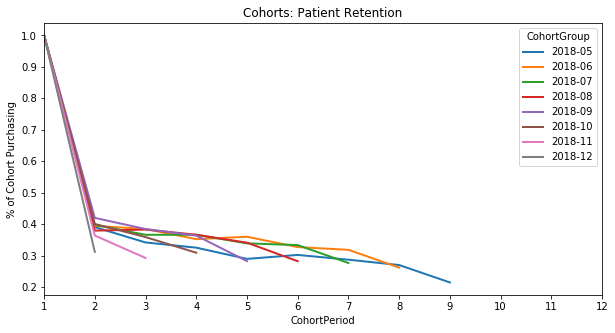

In [18]:
# plot the cohorts over time in an effort to spot behavioral differences or similarities
user_retention[['2018-05', '2018-06','2018-07', '2018-08', '2018-09','2018-10', '2018-11', '2018-12']].plot(figsize=(10,5))
plt.title('Cohorts: Patient Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

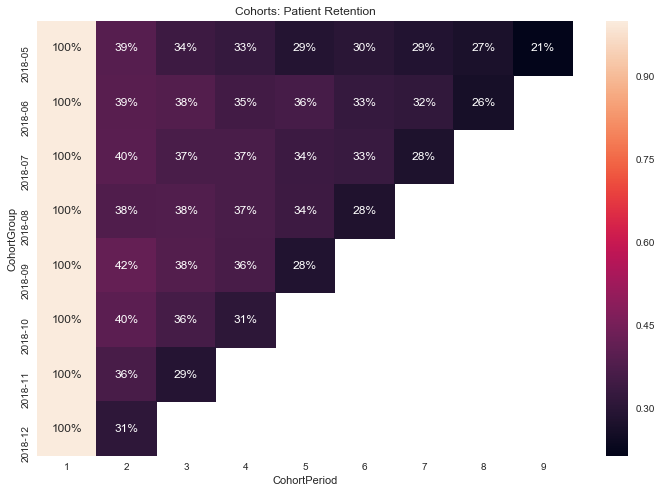

In [19]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

### <font color=blue>2) Cohort Anaylsis II: Based on the patients' first order period and acquisition source</font>

**a. Pull count of customers and orders by Acquisition Source, and Rollup data by CohortGroup x Acq Source & OrderPeriod**

In [20]:
grouped = df.groupby(['acquisition_source'])

# count the unique users, orders per Group + Period
cohorts = grouped.agg({'patient_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'patient_id': 'TotalPatients',
                        'order_id': 'TotalOrders'}, inplace=True)
cohorts

,TotalPatients,TotalOrders
acquisition_source,,
Activated Doctor,8844,23657
Organic,5696,25927
Unactivated Doctor,2665,9121


In [21]:
grouped = df.groupby(['CohortGroup_x_Acq_Source', 'OrderPeriod'])

# count the unique users, orders per Group + Period
cohorts = grouped.agg({'patient_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique,
                       'delivered_on_time': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'patient_id': 'TotalPatients',
                        'order_id': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalPatients  TotalOrders  \
CohortGroup_x_Acq_Source OrderPeriod                               
2018-05_Activated Doctor 2018-05               1062         1279   
                         2018-06                327          460   
                         2018-07                282          390   
                         2018-08                254          372   
                         2018-09                224          323   

                                      delivered_on_time  
CohortGroup_x_Acq_Source OrderPeriod                     
2018-05_Activated Doctor 2018-05                   1463  
                         2018-06                    582  
                         2018-07                    509  
                         2018-08                    488  
                         2018-09                    441

**b. Label the CohortPeriod for each CohortGroup x Acq Source**

In [22]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the customer's first order.
    
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalPatients  TotalOrders  \
CohortGroup_x_Acq_Source OrderPeriod                               
2018-05_Activated Doctor 2018-05               1062         1279   
                         2018-06                327          460   
                         2018-07                282          390   
                         2018-08                254          372   
                         2018-09                224          323   

                                      delivered_on_time  CohortPeriod  
CohortGroup_x_Acq_Source OrderPeriod                                   
2018-05_Activated Doctor 2018-05                   1463             1  
                         2018-06                    582             2  
                         2018-07                    509             3  
                         2018-08                    488             4  
                         2018-09                    441             5

**c. User Retention by Cohort Group x Acq Source**

In [23]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup_x_Acq_Source', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalPatients'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup_x_Acq_Source
2018-05_Activated Doctor      1062
2018-05_Organic                640
2018-05_Unactivated Doctor     288
2018-06_Activated Doctor       927
2018-06_Organic                732
Name: TotalPatients, dtype: int64

In [24]:
# unstack our cohorts DataFrame to create a matrix where each column represents a CohortGroup 
# and each row is the CohortPeriod corresponding to that group

cohorts['TotalPatients'].unstack(0).head()

CohortGroup_x_Acq_Source,2018-05_Activated Doctor,2018-05_Organic,2018-05_Unactivated Doctor,2018-06_Activated Doctor,2018-06_Organic,2018-06_Unactivated Doctor,2018-07_Activated Doctor,2018-07_Organic,2018-07_Unactivated Doctor,2018-08_Activated Doctor,2018-08_Organic,2018-08_Unactivated Doctor,2018-09_Activated Doctor,2018-09_Organic,2018-09_Unactivated Doctor,2018-10_Activated Doctor,2018-10_Organic,2018-10_Unactivated Doctor,2018-11_Activated Doctor,2018-11_Organic,2018-11_Unactivated Doctor,2018-12_Activated Doctor,2018-12_Organic,2018-12_Unactivated Doctor
CohortPeriod,,,,,,,,,,,,,,,,,,,,,,,,
1,1062.0,640.0,288.0,927.0,732.0,289.0,797.0,560.0,293.0,1071.0,709.0,358.0,1011.0,705.0,342.0,1431.0,840.0,363.0,1352.0,724.0,369.0,1193.0,786.0,363.0
2,327.0,340.0,110.0,273.0,392.0,103.0,253.0,293.0,110.0,329.0,357.0,125.0,332.0,391.0,141.0,476.0,435.0,144.0,389.0,347.0,153.0,274.0,335.0,121.0
3,282.0,295.0,103.0,254.0,386.0,109.0,216.0,287.0,101.0,320.0,374.0,124.0,300.0,359.0,132.0,424.0,397.0,124.0,321.0,288.0,106.0,NaN,NaN,NaN
4,254.0,285.0,108.0,232.0,357.0,97.0,196.0,292.0,116.0,304.0,358.0,121.0,272.0,343.0,133.0,351.0,353.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN
5,224.0,248.0,104.0,249.0,359.0,93.0,192.0,269.0,98.0,274.0,341.0,114.0,203.0,297.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# utilize broadcasting to divide each column by the corresponding cohort_group_size
# The resulting DataFrame, user_retention, contains the percentage of users from the cohort 
# purchasing within the given period
user_retention = cohorts['TotalPatients'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup_x_Acq_Source,2018-05_Activated Doctor,2018-05_Organic,2018-05_Unactivated Doctor,2018-06_Activated Doctor,2018-06_Organic,2018-06_Unactivated Doctor,2018-07_Activated Doctor,2018-07_Organic,2018-07_Unactivated Doctor,2018-08_Activated Doctor,2018-08_Organic,2018-08_Unactivated Doctor,2018-09_Activated Doctor,2018-09_Organic,2018-09_Unactivated Doctor,2018-10_Activated Doctor,2018-10_Organic,2018-10_Unactivated Doctor,2018-11_Activated Doctor,2018-11_Organic,2018-11_Unactivated Doctor,2018-12_Activated Doctor,2018-12_Organic,2018-12_Unactivated Doctor
CohortPeriod,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.307910,0.531250,0.381944,0.294498,0.535519,0.356401,0.317440,0.523214,0.375427,0.307190,0.503526,0.349162,0.328388,0.554610,0.412281,0.332635,0.517857,0.396694,0.287722,0.479282,0.414634,0.229673,0.426209,0.333333
3,0.265537,0.460938,0.357639,0.274002,0.527322,0.377163,0.271016,0.512500,0.344710,0.298786,0.527504,0.346369,0.296736,0.509220,0.385965,0.296296,0.472619,0.341598,0.237426,0.397790,0.287263,NaN,NaN,NaN
4,0.239171,0.445312,0.375000,0.250270,0.487705,0.335640,0.245922,0.521429,0.395904,0.283847,0.504937,0.337989,0.269041,0.486525,0.388889,0.245283,0.420238,0.303030,NaN,NaN,NaN,NaN,NaN,NaN
5,0.210923,0.387500,0.361111,0.268608,0.490437,0.321799,0.240903,0.480357,0.334471,0.255836,0.480959,0.318436,0.200791,0.421277,0.236842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.225047,0.418750,0.326389,0.215750,0.468579,0.325260,0.223338,0.475000,0.361775,0.200747,0.417489,0.256983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.205273,0.398438,0.340278,0.224380,0.442623,0.304498,0.200753,0.389286,0.266212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.189266,0.368750,0.347222,0.179072,0.364754,0.266436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.140301,0.328125,0.236111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


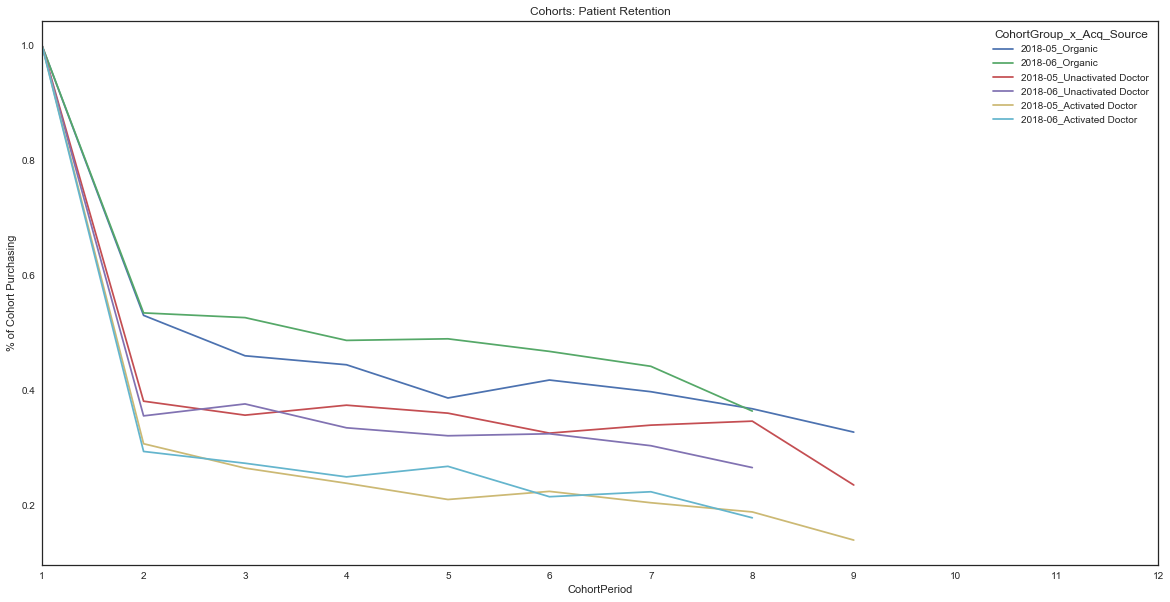

In [26]:
# plot the cohorts over time in an effort to spot behavioral differences or similarities
# look at first two months for simplicity
user_retention[['2018-05_Organic','2018-06_Organic', 
       '2018-05_Unactivated Doctor','2018-06_Unactivated Doctor', 
       '2018-05_Activated Doctor','2018-06_Activated Doctor']].plot(figsize=(20,10))
plt.title('Cohorts: Patient Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

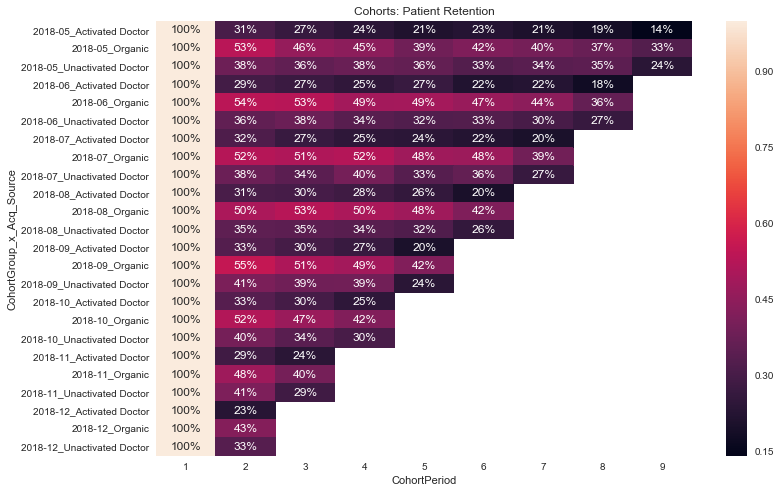

In [27]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

### <font color=blue>3) Cohort Anaylsis III: Based on the patients' first order period and whether they have recurring medication</font>

**a. Pull count of customers and orders by Recurring Medication, and Rollup data by CohortGroup x Recurring & OrderPeriod**

In [28]:
grouped = df.groupby(['is_patient_recurring'])

# count the unique users, orders per Group + Period
cohorts = grouped.agg({'patient_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'patient_id': 'TotalPatients',
                        'order_id': 'TotalOrders'}, inplace=True)
cohorts

,TotalPatients,TotalOrders
is_patient_recurring,,
0,6859,17311
1,10346,41407


In [29]:
grouped = df.groupby(['CohortGroup_x_Recurring', 'OrderPeriod'])

# count the unique users, orders per Group + Period
cohorts = grouped.agg({'patient_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'patient_id': 'TotalPatients',
                        'order_id': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalPatients  TotalOrders
CohortGroup_x_Recurring OrderPeriod                            
2018-05_0               2018-05                721          902
                        2018-06                215          333
                        2018-07                163          237
                        2018-08                161          255
                        2018-09                138          209

**b. Label the CohortPeriod for each CohortGroup x Recurring**

In [30]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the customer's first order.
     
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalPatients  TotalOrders  CohortPeriod
CohortGroup_x_Recurring OrderPeriod                                          
2018-05_0               2018-05                721          902             1
                        2018-06                215          333             2
                        2018-07                163          237             3
                        2018-08                161          255             4
                        2018-09                138          209             5

**c. User Retention by Cohort Group x Recurring**

In [31]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup_x_Recurring', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalPatients'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup_x_Recurring
2018-05_0     721
2018-05_1    1269
2018-06_0     694
2018-06_1    1254
2018-07_0     622
Name: TotalPatients, dtype: int64

In [32]:
# unstack our cohorts DataFrame to create a matrix where each column represents a CohortGroup 
# and each row is the CohortPeriod corresponding to that group
# utilize broadcasting to divide each column by the corresponding cohort_group_size
cohorts['TotalPatients'].unstack(0).head()

CohortGroup_x_Recurring,2018-05_0,2018-05_1,2018-06_0,2018-06_1,2018-07_0,2018-07_1,2018-08_0,2018-08_1,2018-09_0,2018-09_1,2018-10_0,2018-10_1,2018-11_0,2018-11_1,2018-12_0,2018-12_1
CohortPeriod,,,,,,,,,,,,,,,,
1,721.0,1269.0,694.0,1254.0,622.0,1028.0,806.0,1332.0,820.0,1238.0,1062.0,1572.0,1058.0,1387.0,1076.0,1266.0
2,215.0,562.0,168.0,600.0,151.0,505.0,202.0,609.0,235.0,629.0,273.0,782.0,239.0,650.0,227.0,503.0
3,163.0,517.0,164.0,585.0,130.0,474.0,195.0,623.0,217.0,574.0,223.0,722.0,187.0,528.0,NaN,NaN
4,161.0,486.0,138.0,548.0,123.0,481.0,174.0,609.0,194.0,554.0,186.0,628.0,NaN,NaN,NaN,NaN
5,138.0,438.0,149.0,552.0,118.0,441.0,163.0,566.0,146.0,435.0,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# The resulting DataFrame, user_retention, contains the percentage of users from the cohort 
# purchasing within the given period
user_retention = cohorts['TotalPatients'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup_x_Recurring,2018-05_0,2018-05_1,2018-06_0,2018-06_1,2018-07_0,2018-07_1,2018-08_0,2018-08_1,2018-09_0,2018-09_1,2018-10_0,2018-10_1,2018-11_0,2018-11_1,2018-12_0,2018-12_1
CohortPeriod,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.298197,0.442868,0.242075,0.478469,0.242765,0.491245,0.250620,0.457207,0.286585,0.508078,0.257062,0.497455,0.225898,0.468637,0.210967,0.397314
3,0.226075,0.407407,0.236311,0.466507,0.209003,0.461089,0.241935,0.467718,0.264634,0.463651,0.209981,0.459288,0.176749,0.380678,NaN,NaN
4,0.223301,0.382979,0.198847,0.437002,0.197749,0.467899,0.215881,0.457207,0.236585,0.447496,0.175141,0.399491,NaN,NaN,NaN,NaN
5,0.191401,0.345154,0.214697,0.440191,0.189711,0.428988,0.202233,0.424925,0.178049,0.351373,NaN,NaN,NaN,NaN,NaN,NaN
6,0.201110,0.359338,0.200288,0.397129,0.178457,0.427043,0.158809,0.356607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.188627,0.342790,0.171470,0.399522,0.141479,0.357977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.167822,0.327817,0.148415,0.324561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.128988,0.263199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


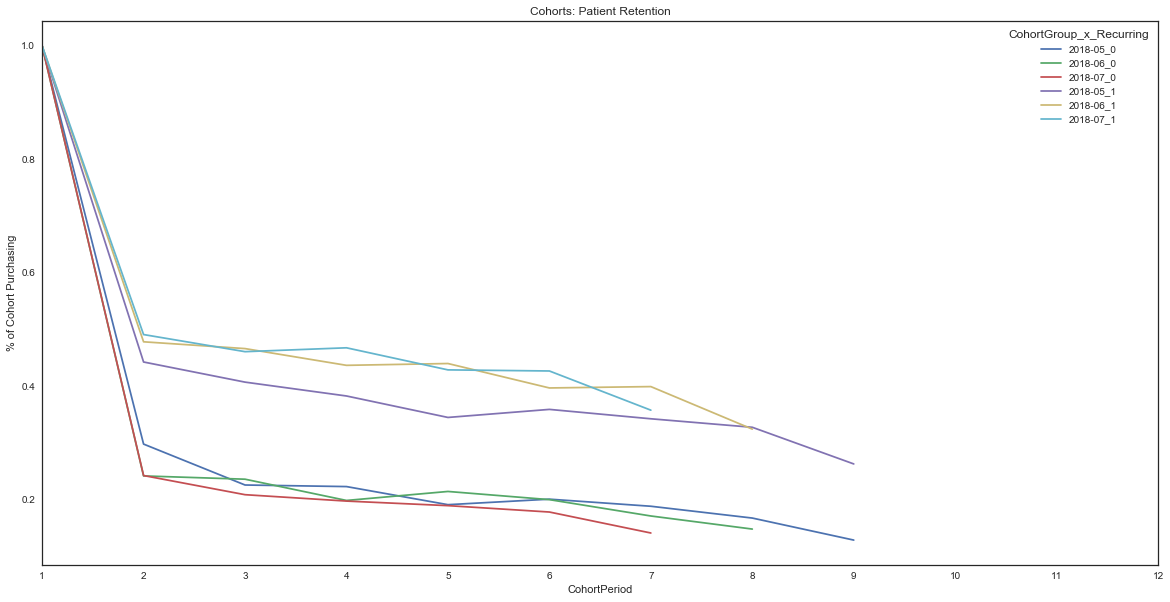

In [34]:
# plot the cohorts over time in an effort to spot behavioral differences or similarities
# look at first three months for simplicity
user_retention[['2018-05_0','2018-06_0', '2018-07_0',
                '2018-05_1','2018-06_1','2018-07_1']].plot(figsize=(20,10))
plt.title('Cohorts: Patient Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

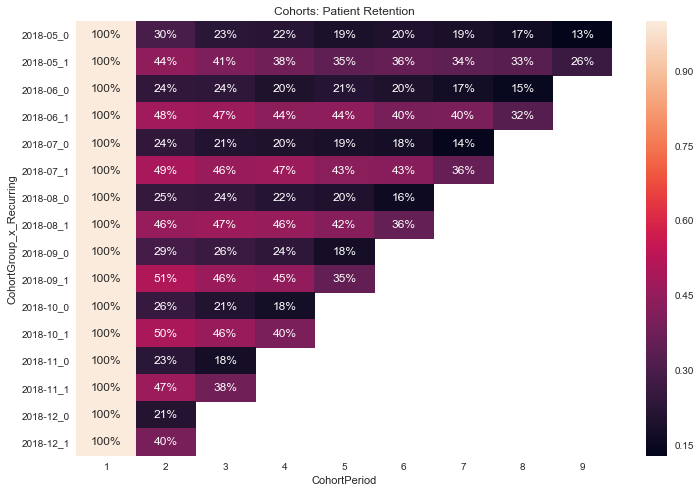

In [35]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

### <font color=blue>4) Cohort Anaylsis IV: Based on the patients' first order period and whether first delivery was on time</font>

**a. Pull count of customers and orders by First Delivery OnTime, and Rollup data by CohortGroup x First Delivery OnTime & OrderPeriod**

In [36]:
grouped = df.groupby(['delivered_on_time_firstOrder'])

# count the unique users, orders per Group + Period
cohorts = grouped.agg({'patient_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'patient_id': 'TotalPatients',
                        'order_id': 'TotalOrders'}, inplace=True)
cohorts

,TotalPatients,TotalOrders
delivered_on_time_firstOrder,,
0,2818,11830
1,15164,52708


In [37]:
grouped = df.groupby(['CohortGroup_x_First_Delivery_OnTime', 'OrderPeriod'])

# count the unique users, orders per Group + Period
cohorts = grouped.agg({'patient_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'patient_id': 'TotalPatients',
                        'order_id': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalPatients  TotalOrders
CohortGroup_x_First_Delivery_OnTime OrderPeriod                            
2018-05_0                           2018-05                443          633
                                    2018-06                195          300
                                    2018-07                182          275
                                    2018-08                173          268
                                    2018-09                140          218

**b. Label the CohortPeriod for each CohortGroup x First Delivery OnTime**

In [38]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the customer's first order.
       
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalPatients  TotalOrders  \
CohortGroup_x_First_Delivery_OnTime OrderPeriod                               
2018-05_0                           2018-05                443          633   
                                    2018-06                195          300   
                                    2018-07                182          275   
                                    2018-08                173          268   
                                    2018-09                140          218   

                                                 CohortPeriod  
CohortGroup_x_First_Delivery_OnTime OrderPeriod                
2018-05_0                           2018-05                 1  
                                    2018-06                 2  
                                    2018-07                 3  
                                    2018-08                 4  
                                    2018-09                 5

**c. User Retention by Cohort Group x First Delivery OnTime**

In [39]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup_x_First_Delivery_OnTime', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalPatients'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup_x_First_Delivery_OnTime
2018-05_0     443
2018-05_1    1671
2018-06_0     426
2018-06_1    1628
2018-07_0     219
Name: TotalPatients, dtype: int64

In [40]:
# unstack our cohorts DataFrame to create a matrix where each column represents a CohortGroup 
# and each row is the CohortPeriod corresponding to that group
# utilize broadcasting to divide each column by the corresponding cohort_group_size
cohorts['TotalPatients'].unstack(0).head()

CohortGroup_x_First_Delivery_OnTime,2018-05_0,2018-05_1,2018-06_0,2018-06_1,2018-07_0,2018-07_1,2018-08_0,2018-08_1,2018-09_0,2018-09_1,2018-10_0,2018-10_1,2018-11_0,2018-11_1,2018-12_0,2018-12_1
CohortPeriod,,,,,,,,,,,,,,,,
1,443.0,1671.0,426.0,1628.0,219.0,1488.0,331.0,1907.0,338.0,1818.0,484.0,2280.0,315.0,2216.0,262.0,2156.0
2,195.0,657.0,178.0,665.0,87.0,606.0,137.0,742.0,166.0,764.0,199.0,939.0,114.0,822.0,91.0,682.0
3,182.0,567.0,176.0,649.0,90.0,548.0,138.0,751.0,152.0,702.0,179.0,838.0,90.0,665.0,NaN,NaN
4,173.0,543.0,163.0,589.0,92.0,549.0,130.0,714.0,143.0,665.0,140.0,740.0,NaN,NaN,NaN,NaN
5,140.0,492.0,164.0,605.0,87.0,510.0,123.0,666.0,113.0,517.0,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# The resulting DataFrame, user_retention, contains the percentage of users from the cohort 
# purchasing within the given period
user_retention = cohorts['TotalPatients'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup_x_First_Delivery_OnTime,2018-05_0,2018-05_1,2018-06_0,2018-06_1,2018-07_0,2018-07_1,2018-08_0,2018-08_1,2018-09_0,2018-09_1,2018-10_0,2018-10_1,2018-11_0,2018-11_1,2018-12_0,2018-12_1
CohortPeriod,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.440181,0.393178,0.417840,0.408477,0.397260,0.407258,0.413897,0.389093,0.491124,0.420242,0.411157,0.411842,0.361905,0.370939,0.347328,0.316327
3,0.410835,0.339318,0.413146,0.398649,0.410959,0.368280,0.416918,0.393812,0.449704,0.386139,0.369835,0.367544,0.285714,0.300090,NaN,NaN
4,0.390519,0.324955,0.382629,0.361794,0.420091,0.368952,0.392749,0.374410,0.423077,0.365787,0.289256,0.324561,NaN,NaN,NaN,NaN
5,0.316027,0.294434,0.384977,0.371622,0.397260,0.342742,0.371601,0.349240,0.334320,0.284378,NaN,NaN,NaN,NaN,NaN,NaN
6,0.313770,0.308797,0.347418,0.337838,0.374429,0.336694,0.305136,0.289460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.322799,0.291442,0.338028,0.332924,0.301370,0.278226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.288939,0.274686,0.274648,0.271499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.223476,0.220826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


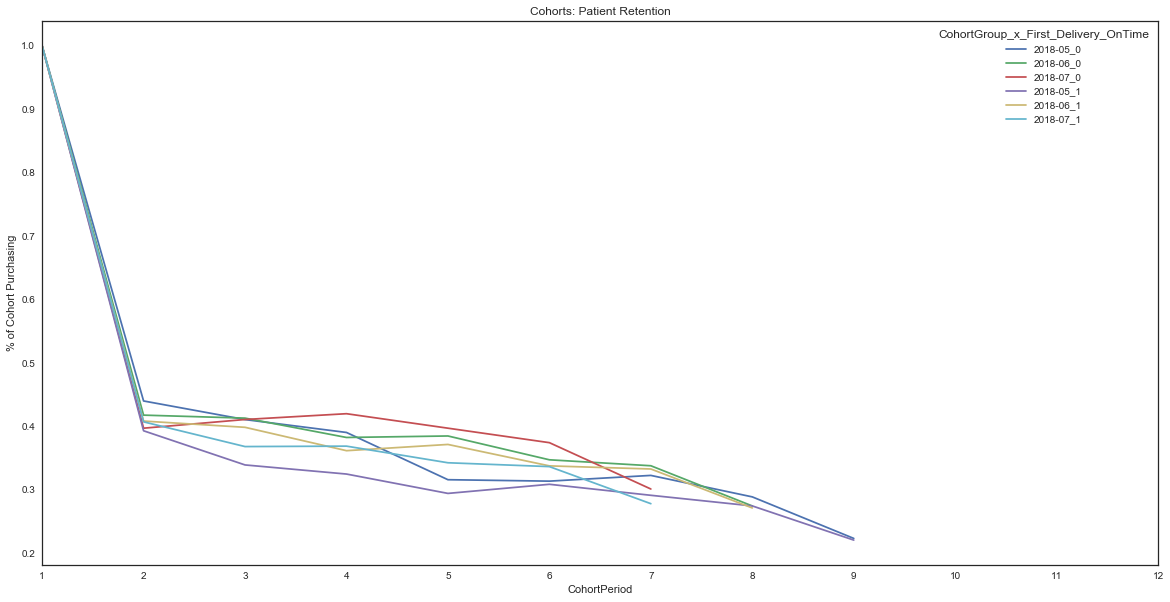

In [42]:
# plot the cohorts over time in an effort to spot behavioral differences or similarities
# look at first three months for simplicity
user_retention[['2018-05_0','2018-06_0', '2018-07_0',
                '2018-05_1','2018-06_1','2018-07_1']].plot(figsize=(20,10))
plt.title('Cohorts: Patient Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

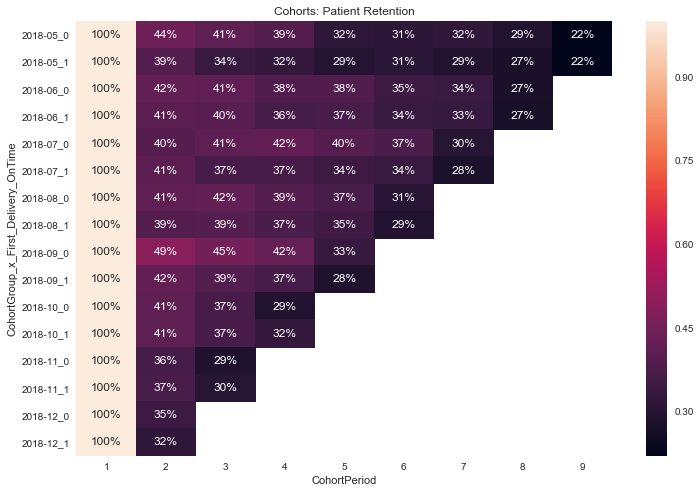

In [43]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

### <font color=blue>5) Cohort Anaylsis V: Based on the patients' first order period and partner manager</font>

**a. Pull count of customers and orders by Partner Manger, and Rollup data by CohortGroup x Partner_Manager & OrderPeriod**

In [44]:
grouped = df.groupby(['partnerships_manager'])

# count the unique users, orders per Group + Period
cohorts = grouped.agg({'patient_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'patient_id': 'TotalPatients',
                        'order_id': 'TotalOrders'}, inplace=True)
cohorts

,TotalPatients,TotalOrders
partnerships_manager,,
Chelsey,202,1267
Corinne,3946,11118
Jason,762,4302
Jesse,1395,3351
Jessica,96,397
Kerry,2026,4509
Kylene,209,404
Luis,78,198
Marlon,1933,5808


In [45]:
grouped = df.groupby(['CohortGroup_x_Partner_Manager', 'OrderPeriod'])

# count the unique users, orders per Group + Period
cohorts = grouped.agg({'patient_id': pd.Series.nunique,
                       'order_id': pd.Series.nunique})

# make the column names more meaningful
cohorts.rename(columns={'patient_id': 'TotalPatients',
                        'order_id': 'TotalOrders'}, inplace=True)
cohorts.head()

TotalPatients  TotalOrders
CohortGroup_x_Partner_Manager OrderPeriod                            
2018-05_Chelsey               2018-05                 24           34
                              2018-06                 17           24
                              2018-07                 16           28
                              2018-08                 14           24
                              2018-09                 16           27

**b. Label the CohortPeriod for each CohortGroup x Partner_Manager**

In [46]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the customer's first order.
      
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalPatients  TotalOrders  \
CohortGroup_x_Partner_Manager OrderPeriod                               
2018-05_Chelsey               2018-05                 24           34   
                              2018-06                 17           24   
                              2018-07                 16           28   
                              2018-08                 14           24   
                              2018-09                 16           27   

                                           CohortPeriod  
CohortGroup_x_Partner_Manager OrderPeriod                
2018-05_Chelsey               2018-05                 1  
                              2018-06                 2  
                              2018-07                 3  
                              2018-08                 4  
                              2018-09                 5

**c. User Retention by Cohort Group x Partner_Manager**

In [47]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup_x_Partner_Manager', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalPatients'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup_x_Partner_Manager
2018-05_Chelsey      24
2018-05_Corinne     658
2018-05_Jason        92
2018-05_Jesse       132
2018-05_Jessica       8
Name: TotalPatients, dtype: int64

In [48]:
# unstack our cohorts DataFrame to create a matrix where each column represents a CohortGroup 
# and each row is the CohortPeriod corresponding to that group
# utilize broadcasting to divide each column by the corresponding cohort_group_size

cohorts['TotalPatients'].unstack(0).head()

CohortGroup_x_Partner_Manager,2018-05_Chelsey,2018-05_Corinne,2018-05_Jason,2018-05_Jesse,2018-05_Jessica,2018-05_Kerry,2018-05_Kylene,2018-05_Luis,2018-05_Marlon,2018-05_Nishant,2018-05_Shanice,2018-05_Tikki,2018-05_Tom,2018-05_none,2018-06_Chelsey,2018-06_Corinne,2018-06_Jason,2018-06_Jesse,2018-06_Jessica,2018-06_Kerry,2018-06_Kylene,2018-06_Luis,2018-06_Marlon,2018-06_Nishant,2018-06_Shanice,...,2018-11_Jesse,2018-11_Jessica,2018-11_Kerry,2018-11_Kylene,2018-11_Luis,2018-11_Marlon,2018-11_Nishant,2018-11_Shanice,2018-11_Tikki,2018-11_Tom,2018-11_none,2018-12_Chelsey,2018-12_Corinne,2018-12_Jason,2018-12_Jesse,2018-12_Jessica,2018-12_Kerry,2018-12_Kylene,2018-12_Luis,2018-12_Marlon,2018-12_Nishant,2018-12_Shanice,2018-12_Tikki,2018-12_Tom,2018-12_none
CohortPeriod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,24.0,658.0,92.0,132.0,8.0,211.0,21.0,3.0,204.0,184.0,6.0,145.0,58.0,251.0,27.0,579.0,106.0,137.0,7.0,155.0,14.0,3.0,222.0,149.0,9.0,...,238.0,13.0,371.0,57.0,15.0,281.0,210.0,6.0,269.0,168.0,301.0,30.0,351.0,88.0,155.0,9.0,337.0,60.0,22.0,302.0,172.0,14.0,316.0,152.0,338.0
2,17.0,185.0,44.0,42.0,4.0,47.0,5.0,2.0,80.0,124.0,3.0,68.0,35.0,122.0,15.0,150.0,47.0,29.0,4.0,35.0,6.0,2.0,87.0,105.0,4.0,...,59.0,7.0,89.0,13.0,5.0,92.0,121.0,2.0,88.0,103.0,133.0,18.0,83.0,28.0,38.0,5.0,69.0,8.0,5.0,84.0,91.0,7.0,73.0,94.0,128.0
3,16.0,150.0,42.0,36.0,3.0,51.0,2.0,2.0,72.0,109.0,4.0,56.0,34.0,106.0,14.0,162.0,42.0,33.0,3.0,39.0,4.0,2.0,67.0,93.0,4.0,...,44.0,3.0,72.0,5.0,1.0,66.0,107.0,4.0,64.0,97.0,107.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.0,144.0,43.0,30.0,2.0,40.0,3.0,2.0,71.0,96.0,3.0,59.0,33.0,110.0,14.0,124.0,44.0,29.0,3.0,41.0,3.0,2.0,70.0,93.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16.0,117.0,38.0,33.0,3.0,33.0,2.0,2.0,50.0,99.0,4.0,47.0,34.0,99.0,15.0,140.0,48.0,31.0,3.0,32.0,4.0,3.0,70.0,98.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# The resulting DataFrame, user_retention, contains the percentage of users from the cohort 
# purchasing within the given period
user_retention = cohorts['TotalPatients'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup_x_Partner_Manager,2018-05_Chelsey,2018-05_Corinne,2018-05_Jason,2018-05_Jesse,2018-05_Jessica,2018-05_Kerry,2018-05_Kylene,2018-05_Luis,2018-05_Marlon,2018-05_Nishant,2018-05_Shanice,2018-05_Tikki,2018-05_Tom,2018-05_none,2018-06_Chelsey,2018-06_Corinne,2018-06_Jason,2018-06_Jesse,2018-06_Jessica,2018-06_Kerry,2018-06_Kylene,2018-06_Luis,2018-06_Marlon,2018-06_Nishant,2018-06_Shanice,...,2018-11_Jesse,2018-11_Jessica,2018-11_Kerry,2018-11_Kylene,2018-11_Luis,2018-11_Marlon,2018-11_Nishant,2018-11_Shanice,2018-11_Tikki,2018-11_Tom,2018-11_none,2018-12_Chelsey,2018-12_Corinne,2018-12_Jason,2018-12_Jesse,2018-12_Jessica,2018-12_Kerry,2018-12_Kylene,2018-12_Luis,2018-12_Marlon,2018-12_Nishant,2018-12_Shanice,2018-12_Tikki,2018-12_Tom,2018-12_none
CohortPeriod,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.0,1.000000,1.000000,1.000000
2,0.708333,0.281155,0.478261,0.318182,0.500,0.222749,0.238095,0.666667,0.392157,0.673913,0.500000,0.468966,0.603448,0.486056,0.555556,0.259067,0.443396,0.211679,0.571429,0.225806,0.428571,0.666667,0.391892,0.704698,0.444444,...,0.247899,0.538462,0.239892,0.228070,0.333333,0.327402,0.576190,0.333333,0.327138,0.613095,0.441860,0.6,0.236467,0.318182,0.245161,0.555556,0.204748,0.133333,0.227273,0.278146,0.52907,0.5,0.231013,0.618421,0.378698
3,0.666667,0.227964,0.456522,0.272727,0.375,0.241706,0.095238,0.666667,0.352941,0.592391,0.666667,0.386207,0.586207,0.422311,0.518519,0.279793,0.396226,0.240876,0.428571,0.251613,0.285714,0.666667,0.301802,0.624161,0.444444,...,0.184874,0.230769,0.194070,0.087719,0.066667,0.234875,0.509524,0.666667,0.237918,0.577381,0.355482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.583333,0.218845,0.467391,0.227273,0.250,0.189573,0.142857,0.666667,0.348039,0.521739,0.500000,0.406897,0.568966,0.438247,0.518519,0.214162,0.415094,0.211679,0.428571,0.264516,0.214286,0.666667,0.315315,0.624161,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.666667,0.177812,0.413043,0.250000,0.375,0.156398,0.095238,0.666667,0.245098,0.538043,0.666667,0.324138,0.586207,0.394422,0.555556,0.241796,0.452830,0.226277,0.428571,0.206452,0.285714,1.000000,0.315315,0.657718,0.555556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.458333,0.199088,0.380435,0.234848,0.500,0.146919,0.047619,0.666667,0.259804,0.565217,0.833333,0.413793,0.517241,0.418327,0.444444,0.176166,0.433962,0.204380,0.428571,0.206452,0.357143,0.666667,0.288288,0.610738,0.444444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.583333,0.179331,0.369565,0.242424,0.625,0.132701,0.095238,0.333333,0.284314,0.510870,0.500000,0.317241,0.517241,0.422311,0.444444,0.177893,0.433962,0.233577,0.428571,0.238710,0.285714,0.666667,0.292793,0.550336,0.444444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.583333,0.164134,0.402174,0.204545,0.625,0.118483,0.095238,0.666667,0.235294,0.483696,0.500000,0.344828,0.534483,0.390438,0.444444,0.146805,0.396226,0.167883,0.428571,0.180645,0.142857,0.666667,0.252252,0.429530,0.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.458333,0.124620,0.260870,0.159091,0.375,0.075829,0.142857,0.666667,0.191176,0.413043,0.666667,0.289655,0.362069,0.334661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

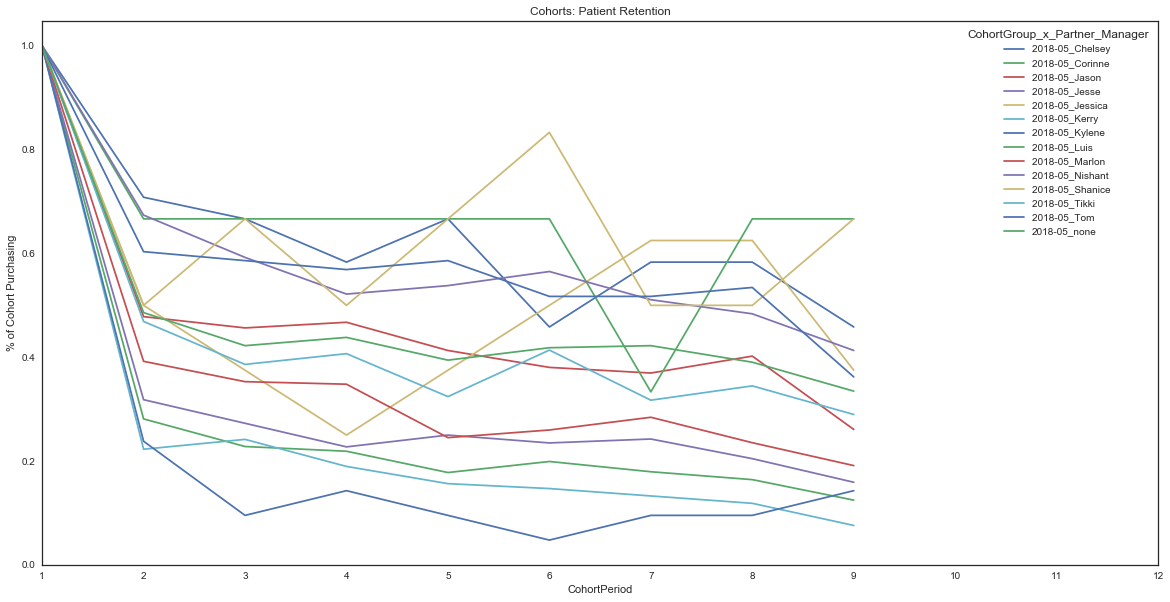

In [50]:
# plot the cohorts over time in an effort to spot behavioral differences or similarities
# look at first month for simplicity
user_retention[['2018-05_Chelsey ',
 '2018-05_Corinne ',
 '2018-05_Jason ',
 '2018-05_Jesse ',
 '2018-05_Jessica ',
 '2018-05_Kerry ',
 '2018-05_Kylene ',
 '2018-05_Luis ',
 '2018-05_Marlon ',
 '2018-05_Nishant ',
 '2018-05_Shanice ',
 '2018-05_Tikki ',
 '2018-05_Tom ',
 '2018-05_none']].plot(figsize=(20,10))
plt.title('Cohorts: Patient Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Purchasing');

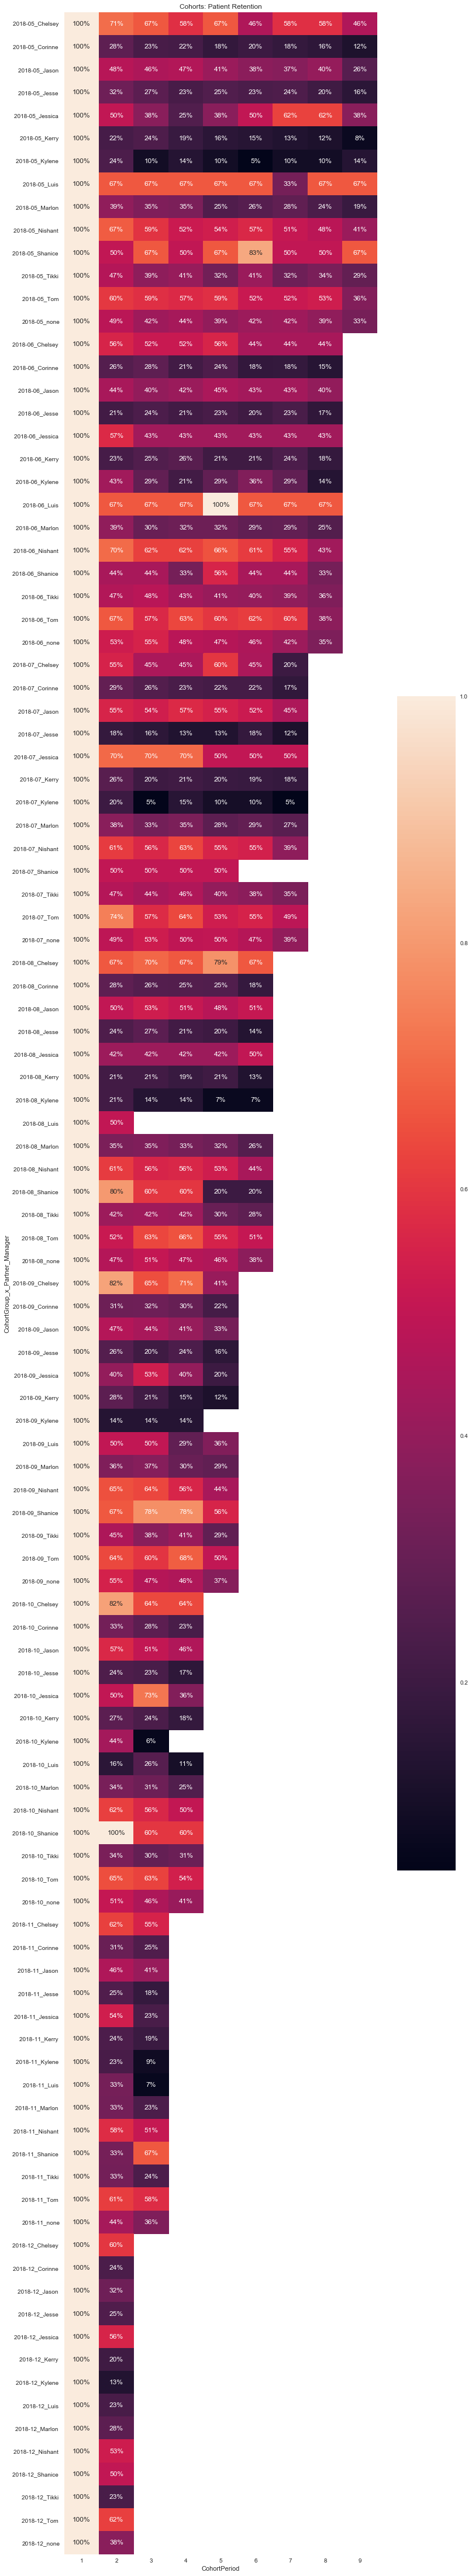

In [51]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 80))
plt.title('Cohorts: Patient Retention')

sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

**c.1) partner manager = none**

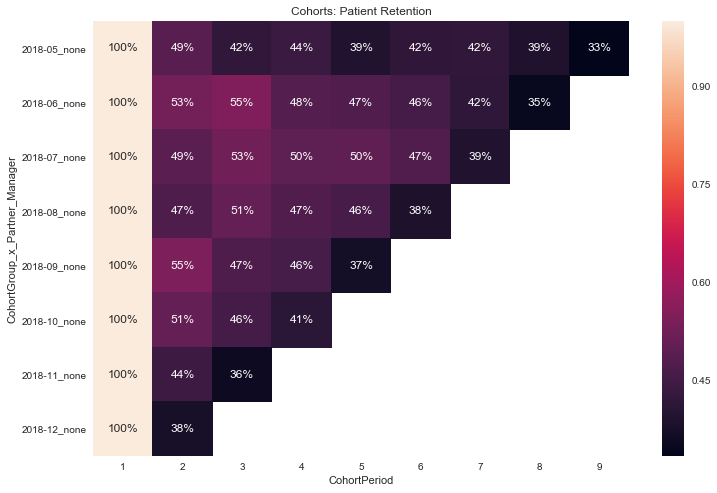

In [52]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'none'
user_retention_sub = user_retention.filter(regex='none')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.2) partner manager = Jason**

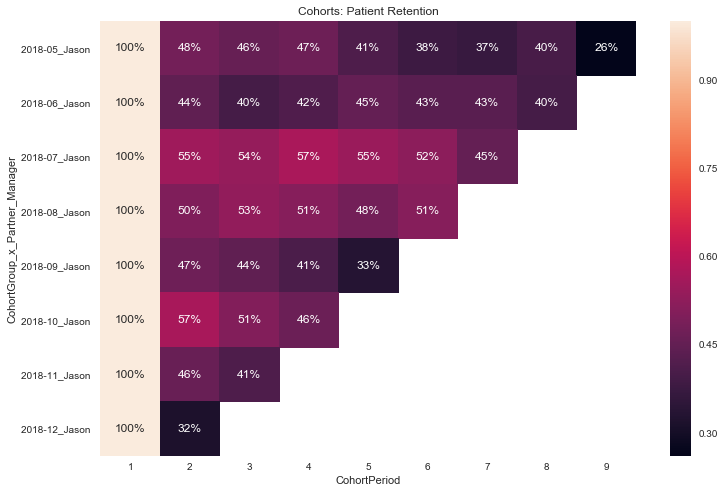

In [53]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'Jason'
user_retention_sub = user_retention.filter(regex='Jason')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.3) partner manager = Nishant**

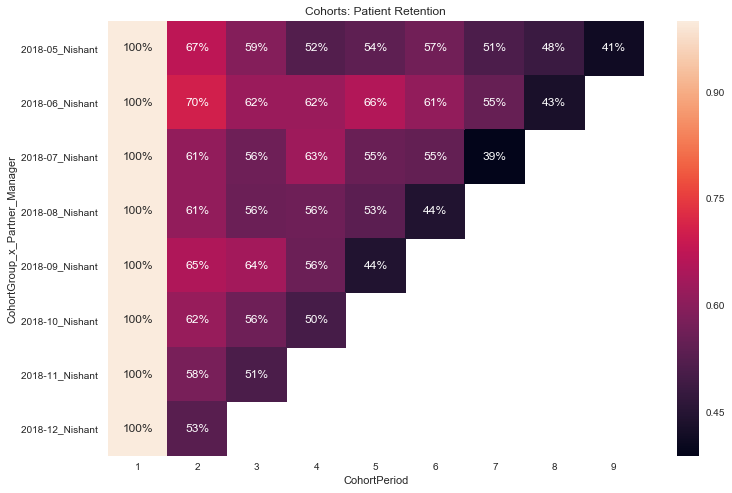

In [54]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')


# filter for 'Nishant'
user_retention_sub = user_retention.filter(regex='Nishant')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.4) partner manager = Kerry**

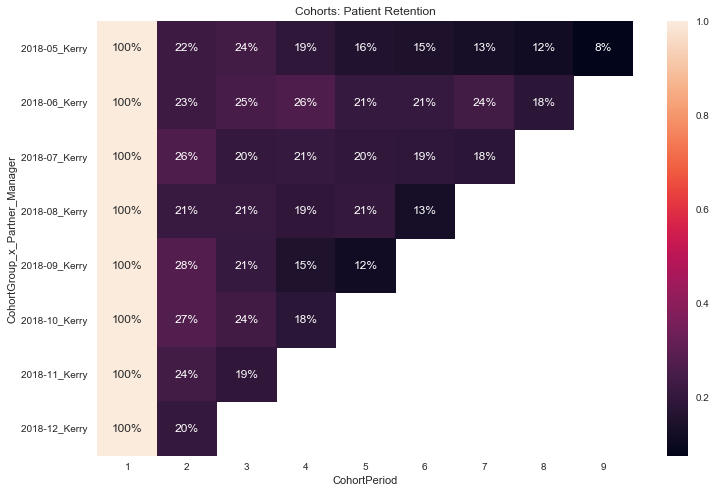

In [55]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'Kerry'
user_retention_sub = user_retention.filter(regex='Kerry')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.5) partner manager = Jessica**

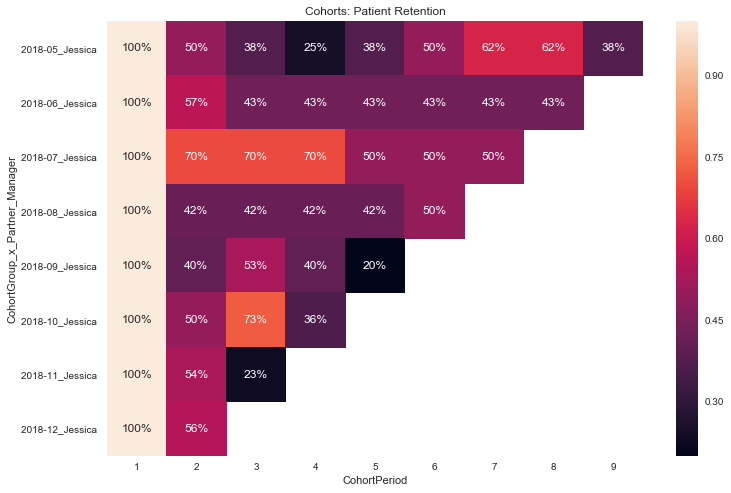

In [56]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'Jessica'
user_retention_sub = user_retention.filter(regex='Jessica')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.6) partner manager = Marlon**

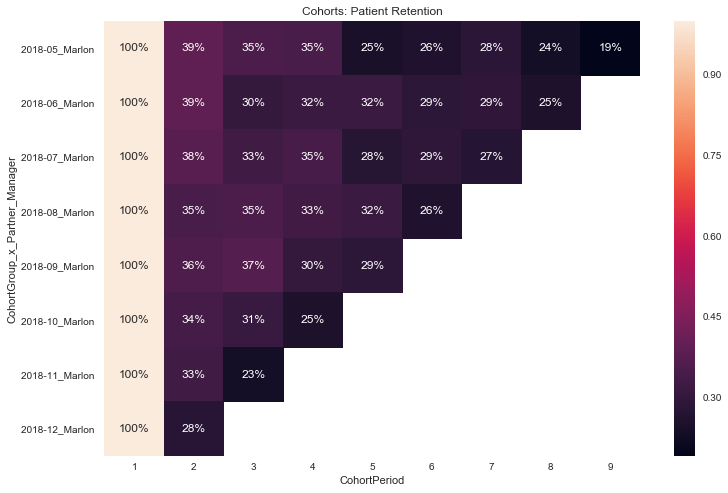

In [57]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'Marlon'
user_retention_sub = user_retention.filter(regex='Marlon')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.7) partner manager = Corinne**

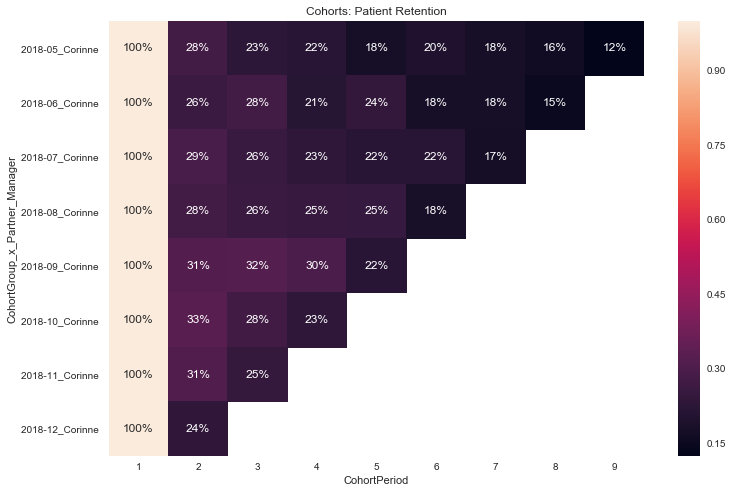

In [58]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'Corinne'
user_retention_sub = user_retention.filter(regex='Corinne')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.8) partner manager = Jesse**

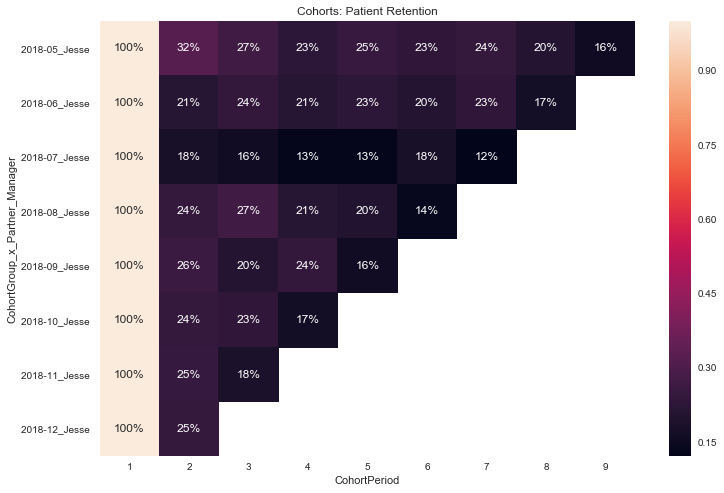

In [59]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'Jesse'
user_retention_sub = user_retention.filter(regex='Jesse')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.9) partner manager = Tom**

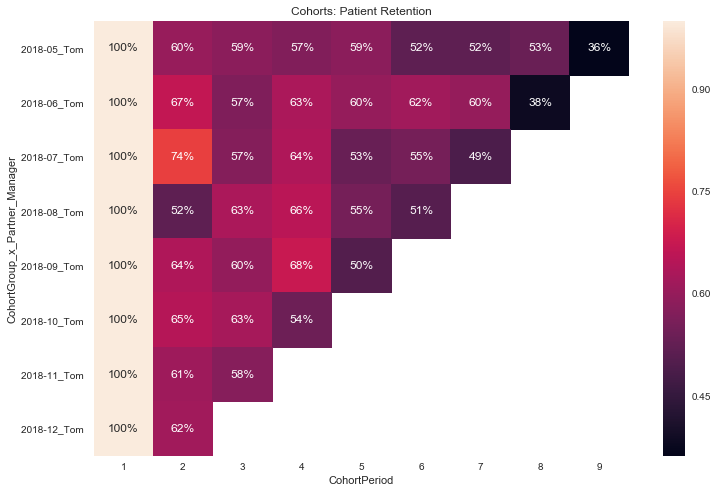

In [60]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'Tom'
user_retention_sub = user_retention.filter(regex='Tom')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.10) partner manager = Chelsey**

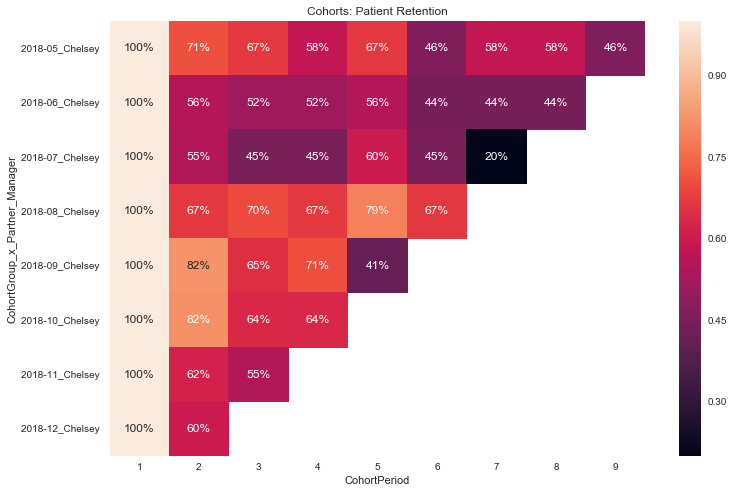

In [61]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'Chelsey'
user_retention_sub = user_retention.filter(regex='Chelsey')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.11) partner manager = Tikki**

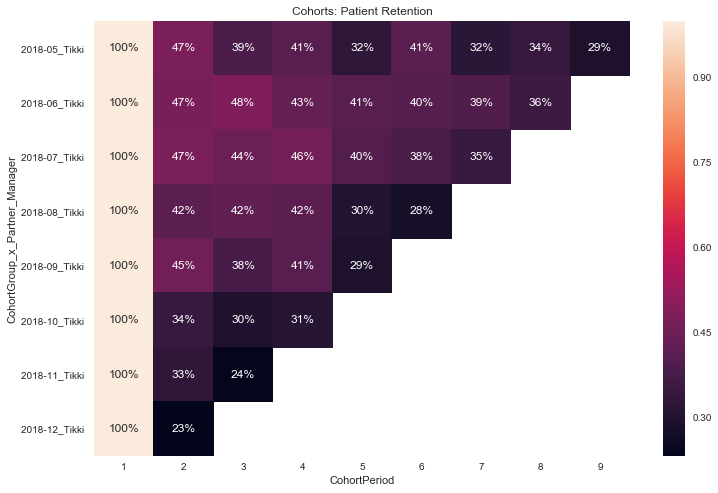

In [62]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'Tikki'
user_retention_sub = user_retention.filter(regex='Tikki')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.12) partner manager = Kylene**

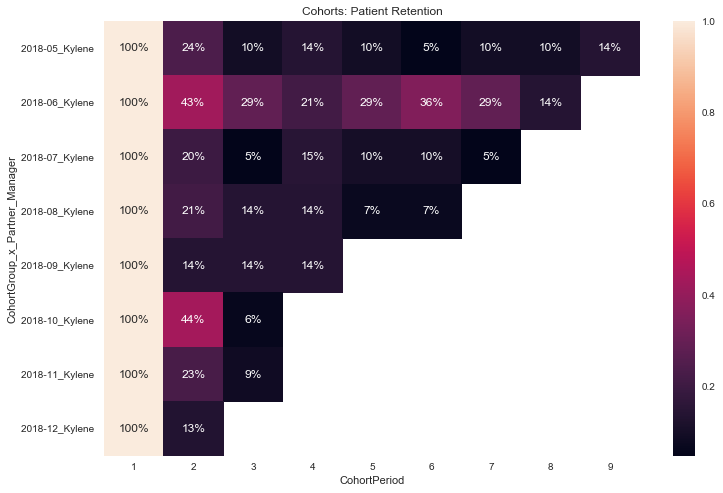

In [63]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'Kylene'
user_retention_sub = user_retention.filter(regex='Kylene')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.13) partner manager = Shanice**

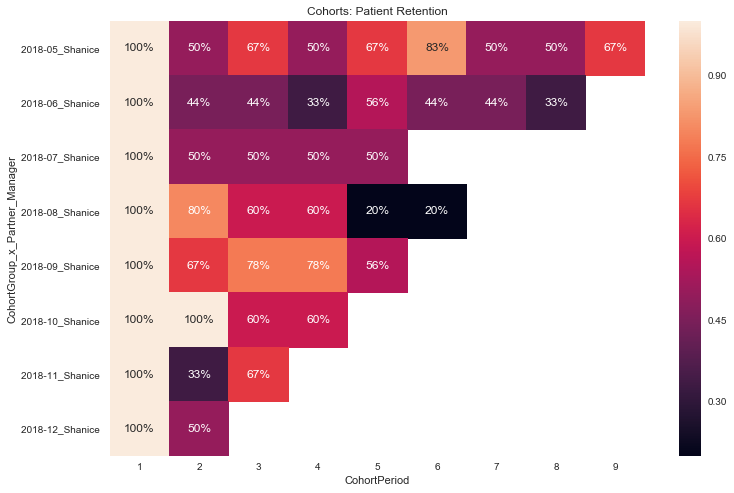

In [64]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'Shanice'
user_retention_sub = user_retention.filter(regex='Shanice')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

**c.14) partner manager = Luis**

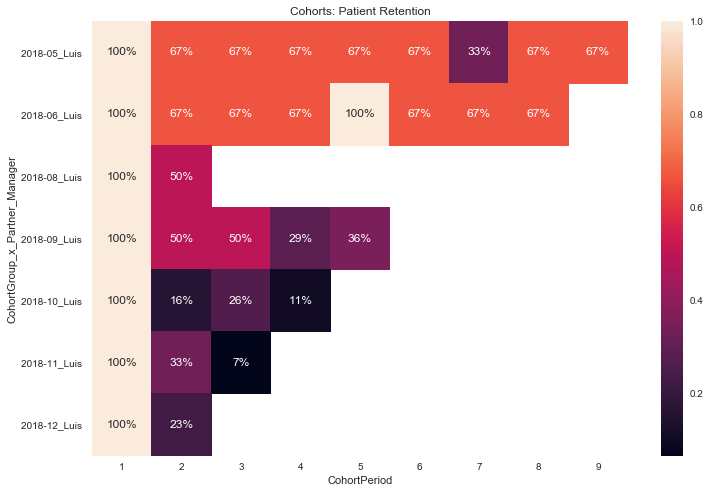

In [65]:
# Instead of matplotlib, use seaborn to create heatmap

sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: Patient Retention')

# filter for 'Luis'
user_retention_sub = user_retention.filter(regex='Luis')

sns.heatmap(user_retention_sub.T, mask=user_retention_sub.T.isnull(), annot=True, fmt='.0%');

# END